# Pymaceuticals Inc.
---

### Analysis
 

In [166]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"D:\Promi\matplotlib-challenge\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"D:\Promi\matplotlib-challenge\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [167]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(f"Number of mice: {num_mice}")

Number of mice: 249


In [168]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID'], keep=False)]

In [169]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = duplicate_mice[duplicate_mice['Mouse ID'] == 'g989']

# Display the data in the desired table format
duplicate_mouse_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [170]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']

# Display the cleaned data without entries for mouse ID 'g989'
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [171]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = cleaned_data['Mouse ID'].nunique()
print(f"Number of mice in the clean DataFrame: {num_clean_mice}")

Number of mice in the clean DataFrame: 248


## Summary Statistics

In [172]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean', 
    Median='median', 
    Variance='var', 
    Std_Dev='std', 
    Std_Err='sem'
)

# Rename the columns to match the desired titles
summary_statistics.columns= [
'Mean Tumor Volume', 
'Median Tumor Volume', 
'Tumor Volume Variance', 
'Tumor Volume Std. Dev.', 
'Tumor Volume Std. Err.'
]


# Display summary statistics
summary_statistics



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [173]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean', 
    Median='median', 
    Variance='var', 
    Std_Dev='std', 
    Std_Err='sem'
)

# Create a multi-level index for the columns
summary_statistics.columns = pd.MultiIndex.from_tuples([
    ('Tumor Volume (mm3)', 'mean'),
    ('Tumor Volume (mm3)', 'median'),
    ('Tumor Volume (mm3)', 'var'),
    ('Tumor Volume (mm3)', 'std'),
    ('Tumor Volume (mm3)', 'sem')
])

# Display summary statistics
summary_statistics


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

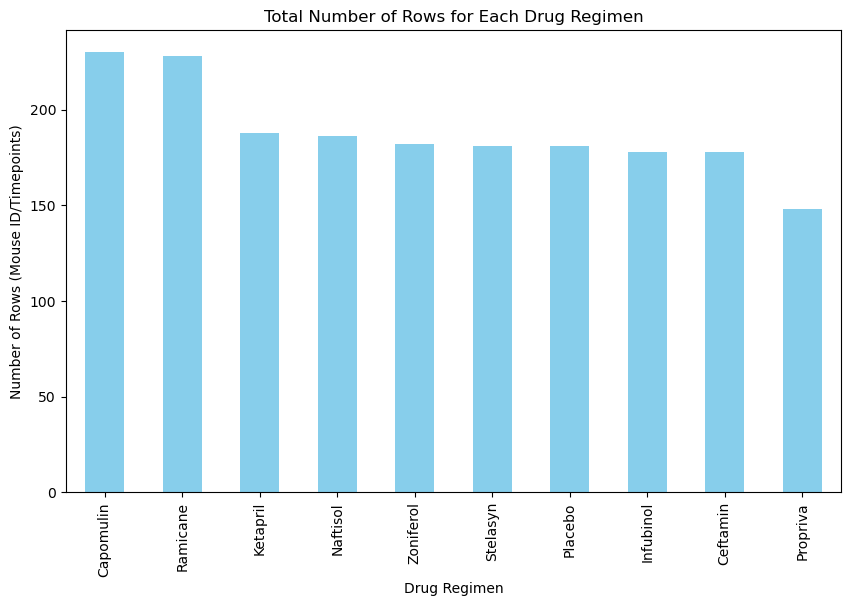

In [174]:
# Count the total number of rows for each drug regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot using pandas
regimen_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Set title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.show()

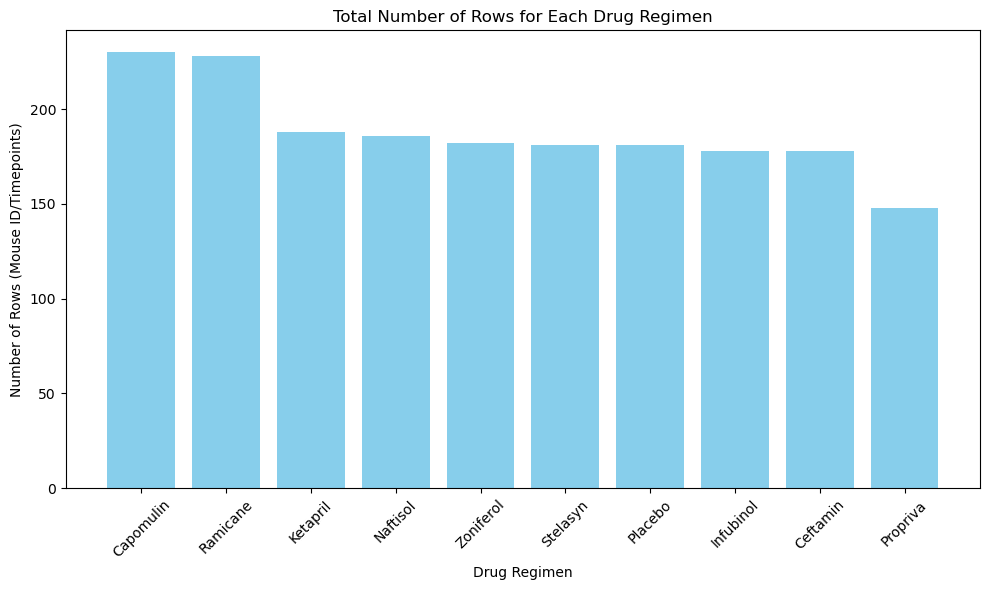

In [175]:
# Count the total number of rows for each drug regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

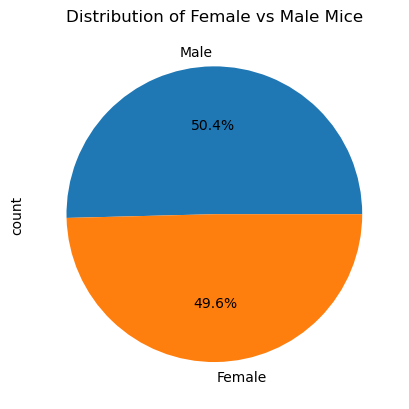

In [176]:
# Get the unique mice with their gender
unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique female and male mice
gender_counts = unique_mice['Sex'].value_counts()

# Generate a pie chart using pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()


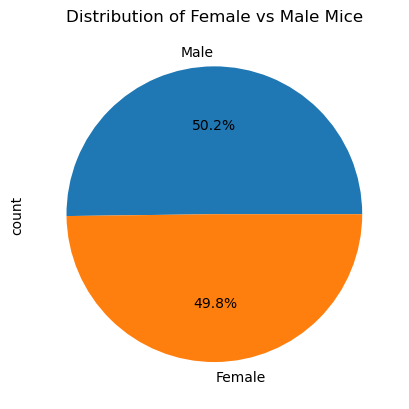

In [177]:
# Get the unique mice with their gender
unique_mice = combined_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique female and male mice
gender_counts = unique_mice['Sex'].value_counts()

# Generate a pie chart using pyplot
plt.figure()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('count')
plt.show()


## Quartiles, Outliers and Boxplots

In [178]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'])

In [179]:
# Create empty list to fill with tumor volume data for plotting
tumor_volumes = []

# Put treatments into a list for for loop (and later for plot labels)
for regimen in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = filtered_data[filtered_data['Drug Regimen'] == regimen]
    volumes = regimen_data['Tumor Volume (mm3)']
    
    # Add tumor volumes to the list
    tumor_volumes.append(volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    Q1 = volumes.quantile(0.25)
    Q3 = volumes.quantile(0.75)
    IQR = Q3 - Q1  # Calculate the interquartile range
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    
    # Print results for each regimen
    print(f"{regimen} - IQR: {IQR:.2f}, Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}, Outliers: {outliers.count()}")


Capomulin - IQR: 7.31, Lower Bound: 26.71, Upper Bound: 55.97, Outliers: 2
Ramicane - IQR: 8.33, Lower Bound: 24.19, Upper Bound: 57.49, Outliers: 1
Infubinol - IQR: 10.00, Lower Bound: 32.31, Upper Bound: 72.32, Outliers: 0
Ceftamin - IQR: 9.59, Lower Bound: 32.82, Upper Bound: 71.19, Outliers: 0


<Figure size 640x480 with 0 Axes>

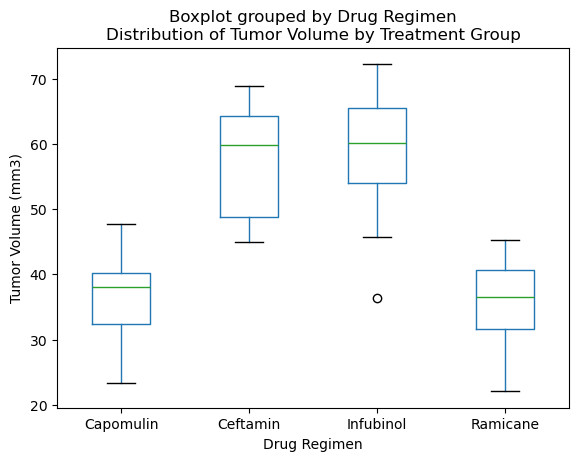

In [180]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure()
last_timepoint_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False)
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

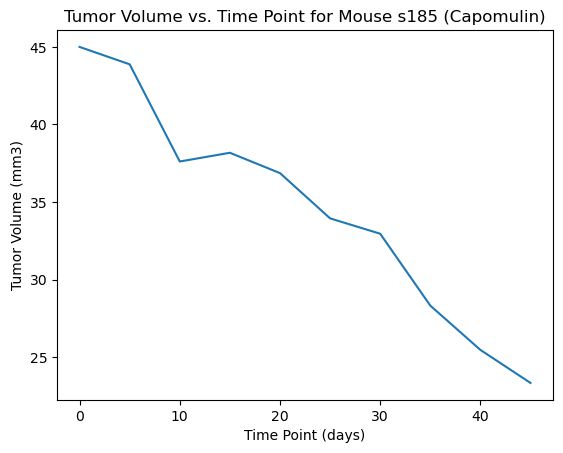

In [181]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the DataFrame for mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin (for example, mouse ID 'l509')
single_mouse_data = cleaned_data[cleaned_data['Mouse ID'] == 's185']

# Generate a line plot of tumor volume vs. time point
plt.figure()
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Time Point for Mouse s185 (Capomulin)')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

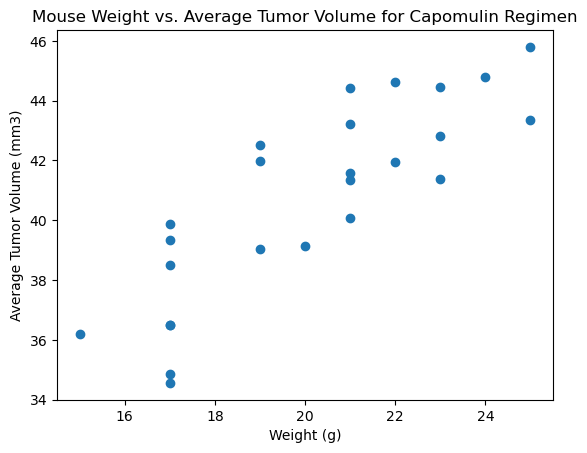

In [182]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame for mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse metadata to get the weights
avg_tumor_weight_data = pd.merge(avg_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Generate a scatter plot of mouse weight vs. average observed tumor volume
plt.figure()
plt.scatter(avg_tumor_weight_data['Weight (g)'], avg_tumor_weight_data['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.84


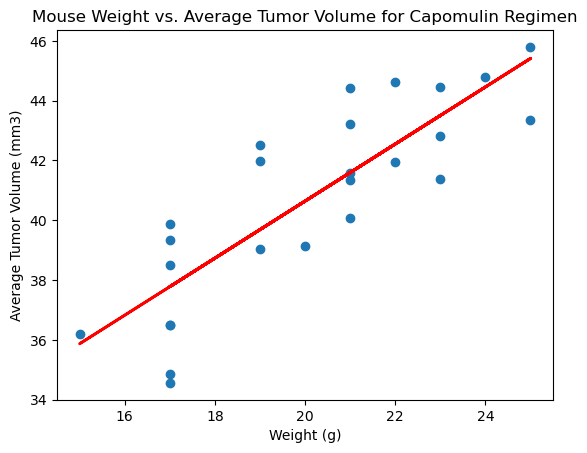

In [183]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
correlation = avg_tumor_weight_data['Weight (g)'].corr(avg_tumor_weight_data['Tumor Volume (mm3)'])
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_weight_data['Weight (g)'], 
                                                              avg_tumor_weight_data['Tumor Volume (mm3)'])

# Generate a line of best fit
x_values = avg_tumor_weight_data['Weight (g)']
y_values = intercept + slope * x_values

# Plotting
plt.figure()
plt.scatter(avg_tumor_weight_data['Weight (g)'], avg_tumor_weight_data['Tumor Volume (mm3)'])
plt.plot(x_values, y_values, color='red', linewidth=2)  # Line of best fit
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()